In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
train=pd.read_csv("/kaggle/input/titanic/train.csv")
test=pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
test.shape

(418, 11)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
train["Survived"].value_counts().keys()

Index([0, 1], dtype='int64', name='Survived')

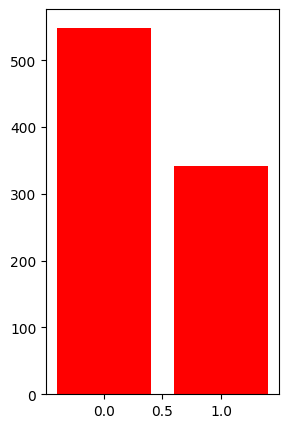

In [8]:
plt.figure(figsize=(3,5))
plt.bar(list(train["Survived"].value_counts().keys()),list(train["Survived"].value_counts()),color="r")
plt.show()

In [9]:
train["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [10]:
train["Pclass"].value_counts().keys()

Index([3, 1, 2], dtype='int64', name='Pclass')

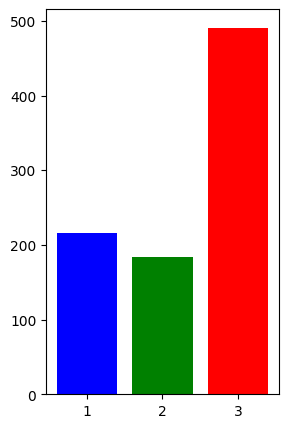

In [11]:
plt.figure(figsize=(3,5))
plt.bar(list(train["Pclass"].value_counts().keys()),list(train["Pclass"].value_counts()),color=["red","blue","green"])
plt.show()

In [12]:
train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

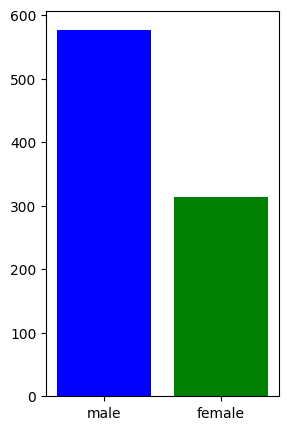

In [13]:
plt.figure(figsize=(3,5))
plt.bar(list(train["Sex"].value_counts().keys()),list(train["Sex"].value_counts()),color=["blue","green"])
plt.show()

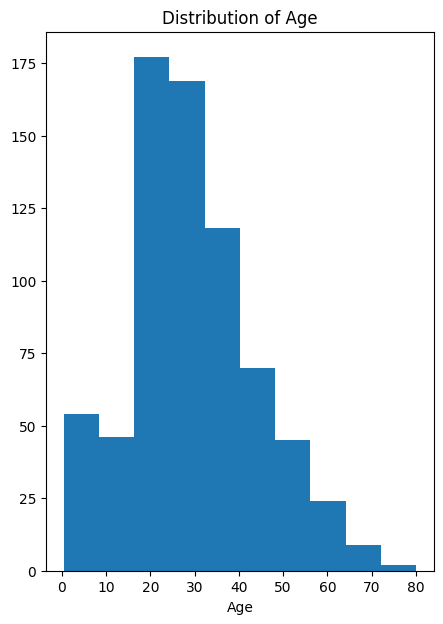

In [14]:
plt.figure(figsize=(5,7))
plt.hist(train["Age"])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

In [15]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
train["Age"].fillna(train["Age"].mean(),inplace=True)

In [18]:
train["Cabin"].fillna(train["Cabin"].mode()[0],inplace=True)

In [19]:
train["Embarked"].fillna(train["Embarked"].mode()[0],inplace=True)

In [20]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [21]:
train.shape

(891, 12)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
categorical = []
for column in train.columns:
  if train[column].dtype =="object":
    categorical.append(column)

In [24]:
categorical

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [25]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder().fit(train[categorical])
train[categorical] = oe.transform(train[categorical])
oe.inverse_transform(train[categorical])

array([['Braund, Mr. Owen Harris', 'male', 'A/5 21171', 'B96 B98', 'S'],
       ['Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female',
        'PC 17599', 'C85', 'C'],
       ['Heikkinen, Miss. Laina', 'female', 'STON/O2. 3101282',
        'B96 B98', 'S'],
       ...,
       ['Johnston, Miss. Catherine Helen "Carrie"', 'female',
        'W./C. 6607', 'B96 B98', 'S'],
       ['Behr, Mr. Karl Howell', 'male', '111369', 'C148', 'C'],
       ['Dooley, Mr. Patrick', 'male', '370376', 'B96 B98', 'Q']],
      dtype=object)

In [26]:
oe.categories_

[array(['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore Edward',
        'Abbott, Mrs. Stanton (Rosa Hunt)', 'Abelson, Mr. Samuel',
        'Abelson, Mrs. Samuel (Hannah Wizosky)',
        'Adahl, Mr. Mauritz Nils Martin', 'Adams, Mr. John',
        'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
        'Aks, Mrs. Sam (Leah Rosen)', 'Albimona, Mr. Nassef Cassem',
        'Alexander, Mr. William', 'Alhomaki, Mr. Ilmari Rudolf',
        'Ali, Mr. Ahmed', 'Ali, Mr. William',
        'Allen, Miss. Elisabeth Walton', 'Allen, Mr. William Henry',
        'Allison, Master. Hudson Trevor', 'Allison, Miss. Helen Loraine',
        'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
        'Allum, Mr. Owen George',
        'Andersen-Jensen, Miss. Carla Christine Nielsine',
        'Anderson, Mr. Harry', 'Andersson, Master. Sigvard Harald Elias',
        'Andersson, Miss. Ebba Iris Alfrida',
        'Andersson, Miss. Ellis Anna Maria',
        'Andersson, Miss. Erna Alexandra',
        'Andersson, 

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    float64
 4   Sex          891 non-null    float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    float64
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    float64
 11  Embarked     891 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 83.7 KB


In [28]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [31]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [32]:
test["Age"].fillna(test["Age"].mean(),inplace=True)

In [33]:
test["Fare"].fillna(test["Fare"].mean(),inplace=True)

In [34]:
test["Cabin"].fillna(test["Cabin"].mode()[0],inplace=True)

In [35]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [36]:
categorical = []
for column in test.columns:
  if test[column].dtype =="object":
    categorical.append(column)

In [37]:
categorical

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [38]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder().fit(test[categorical])
test[categorical] = oe.transform(test[categorical])
oe.inverse_transform(test[categorical])

array([['Kelly, Mr. James', 'male', '330911', 'B57 B59 B63 B66', 'Q'],
       ['Wilkes, Mrs. James (Ellen Needs)', 'female', '363272',
        'B57 B59 B63 B66', 'S'],
       ['Myles, Mr. Thomas Francis', 'male', '240276', 'B57 B59 B63 B66',
        'Q'],
       ...,
       ['Saether, Mr. Simon Sivertsen', 'male', 'SOTON/O.Q. 3101262',
        'B57 B59 B63 B66', 'S'],
       ['Ware, Mr. Frederick', 'male', '359309', 'B57 B59 B63 B66', 'S'],
       ['Peter, Master. Michael J', 'male', '2668', 'B57 B59 B63 B66',
        'C']], dtype=object)

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    float64
 3   Sex          418 non-null    float64
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    float64
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    float64
 10  Embarked     418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [40]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [41]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
x,y=train.drop("Survived",axis=True),train["Survived"]

In [43]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108.0,1.0,22.000000,1,0,523.0,7.2500,47.0,2.0
1,2,1,190.0,0.0,38.000000,1,0,596.0,71.2833,81.0,0.0
2,3,3,353.0,0.0,26.000000,0,0,669.0,7.9250,47.0,2.0
3,4,1,272.0,0.0,35.000000,1,0,49.0,53.1000,55.0,2.0
4,5,3,15.0,1.0,35.000000,0,0,472.0,8.0500,47.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,548.0,1.0,27.000000,0,0,101.0,13.0000,47.0,2.0
887,888,1,303.0,0.0,19.000000,0,0,14.0,30.0000,30.0,2.0
888,889,3,413.0,0.0,29.699118,1,2,675.0,23.4500,47.0,2.0
889,890,1,81.0,1.0,26.000000,0,0,8.0,30.0000,60.0,0.0


In [44]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr=LogisticRegression().fit(x,y)

In [47]:
lr.coef_

array([[ 6.73404615e-04, -2.36663212e-01,  2.18794242e-04,
        -2.10440800e+00, -6.10929056e-03, -2.75788787e-01,
         2.90979349e-01, -7.15812736e-04,  8.18117389e-03,
         2.00524942e-02, -1.67196952e-01]])

In [48]:
lr.intercept_

array([0.22198045])

In [49]:
predict=lr.predict(test)

In [50]:
predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [51]:
predict.shape

(418,)

In [52]:
submission=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [53]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [54]:
submission.shape

(418, 2)

In [55]:
submission["Survived"]=predict

In [56]:
submission.to_csv("submission.csv",index=False)